# Montu Python 
## Astronomical ephemerides for the Ancient World
## Example: Compute *Montunctions*


## Goals of this notebook

The goal of this notebook is to determine the stable positions of mars across ancient Egypt history and check when this *marsticies* happened close to the winter solstice and in the Taurus constellation.

## Loading tools

We need to load the packages and the required data for it (star database, planet position database, etc.):

In [1]:
# Montu packages and data
from montu import *
Montu.load_kernels(verbose=False)
allstars=Stars()

# External packages
import plotly.express as px

# These magic commands are intended to allow updating the packages if they change
%load_ext autoreload
%autoreload 2

## *Marstices*

Lets set observing conditions and initial time of exploration:

In [2]:
earth = PlanetaryBody('Earth')
tebas = ObservingSite(planet=earth,lon=33,lat=24,height=0)

Our target body:

In [3]:
mars = PlanetaryBody('Mars')

Now let's predict all the Marstices in the century from -1400 to -1500:

In [4]:
marstices = pd.DataFrame()
i = 0

# Range of years
initial_year = -2000
final_year = -70

mars.reset_store()
mtime = MonTime(f'{initial_year}-01-01 00:00:00.00',scale='utc',calendar='proleptic')
while True:
    epoch1 = pyplanets_Mars(mtime.obj_pyplanet).station_longitude_1()
    epoch2 = pyplanets_Mars(mtime.obj_pyplanet).station_longitude_2()
    mtime1 = MonTime(float(epoch1),format='jd',calendar='mixed')
    mtime2 = MonTime(float(epoch2),format='jd',calendar='mixed')

    # Stopping condition
    if mtime2.obj_datetime < datetime(-final_year,1,1):
        break

    # Data marstice
    marstice = pd.DataFrame(dict(
        datepro = [mtime1.datestr,mtime2.datestr],
        datemix = [mtime1.datemixed,mtime2.datemixed],
        datejul = [mtime1.obj_datejulianmix,mtime2.obj_datejulianmix],
        jed = [mtime1.jed,mtime2.jed],
    ))

    # Append marstice to table
    marstices = pd.concat([marstices,marstice])

    # Advance 2 years for next marstice
    mtime = mtime + 2*YEAR
    i += 1

marstices.reset_index(drop=True,inplace=True)
marstices

,datepro,datemix,datejul,jed
0,-2001-09-21 12:52:37.175000,-2001-10-08 12:52:37,2711-10-08 12:52:37,9.90473036541377893e+05
1,-2001-12-09 02:02:01.392000,-2001-12-26 02:02:01,2711-12-26 02:02:01,9.90551584738333593e+05
2,-1999-10-25 10:48:04.202000,-1999-11-11 10:48:04,2713-11-11 10:48:04,9.91237950048634782e+05
3,-1998-01-14 00:58:12.633500,-1998-01-31 00:58:13,2714-01-31 00:58:13,9.91318540423999657e+05
4,-1997-11-30 04:28:27.749100,-1997-12-17 04:28:28,2715-12-17 04:28:28,9.92003686432281509e+05
...,...,...,...,...
1927,-74-01-21 08:09:18.375700,-0074-01-23 08:09:18,4638-01-23 08:09:18,1.69405183979601506e+06
1928,-73-12-07 15:27:39.900600,-0073-12-09 15:27:40,4639-12-09 15:27:40,1.69473714421181264e+06
1929,-72-02-26 13:32:48.605000,-0072-02-28 13:32:49,4640-02-28 13:32:49,1.69481806445144652e+06
1930,-70-01-12 01:12:29.1600,-0070-01-14 01:12:29,4642-01-14 01:12:29,1.69550355033566686e+06


Now we want to add to this information other relevant astronomical information:

1. Position of mars in the sky
2. Date of occurrence of winter solstices
3. Angular distance of Mars to Aldebaran

Position of Mars in the sky:

In [5]:
mars.reset_store()
for index in tqdm.tqdm(marstices.index):
    marstice = marstices.loc[index]

    # Get MonTime object
    mtime = MonTime(marstice.jed,format='jd')

    # Calculate Mars position and store it
    mars.calculate_sky_position(mtime,tebas,method='SPICE',store=1,verbose=0)

100%|██████████| 1932/1932 [00:04<00:00, 403.05it/s]


Positions are stored in a separate dataframe:

In [6]:
mars.df

,datetime64,tt,jtd,jed,RAJ2000,DecJ2000,RAEpoch,DecEpoch,LonJ2000,LatJ2000,...,RAEpoch_SPICE,DecEpoch_SPICE,LonJ2000_SPICE,LatJ2000_SPICE,LonEpoch_SPICE,LatEpoch_SPICE,tsa_SPICE,HA_SPICE,az_SPICE,el_SPICE
0,2713-09-21 12:52:37.175000,-1.26236570942693756e+11,9.90473577052155626e+05,9.90473036541377893e+05,7.02612215805537144,23.31899038805205748,3.07424829437436609,17.83482152755087213,104.10813827484894034,0.63037728313572083,...,3.07424829437436609,17.83482152755087213,104.10813827484894034,0.63037728313572083,48.70653404246438356,0.09957254186578871,15.03339815886666742,11.95914986449230177,359.12551577063157993,-48.16090658660912993
1,2713-12-09 02:02:01.392000,-1.26229784378476776e+11,9.90552125249111326e+05,9.90551584738333593e+05,5.63211605823013528,26.21525274908603720,1.77488085538407891,13.75486627208271528,85.04460779688137961,2.87083489804655567,...,1.77488085538407891,13.75486627208271528,85.04460779688137961,2.87083489804655567,29.65041436702179567,2.33999445530319417,9.35149927472951958,7.57661841934544089,292.89157682684452766,-15.02487993126936416
2,2715-10-25 10:48:04.202000,-1.26170482464562759e+11,9.91238489993486670e+05,9.91237950048634782e+05,9.47917079847223931,17.70942043541341704,5.51766626208126976,26.05521826633386340,138.88651619132483006,2.68107491100162099,...,5.51766626208126976,26.05521826633386340,138.88651619132483006,2.68107491100162099,83.49838546880427259,2.29622157581641062,15.21988982957216407,9.70222356749089343,324.10682116842571077,-29.86640713195883734
3,2716-01-14 00:58:12.633500,-1.26163519480569641e+11,9.91319080085999682e+05,9.91318540423999657e+05,8.16550875171110846,24.24933086392621107,4.07879549453416690,24.88879504254419217,119.39931944561732280,4.06436791873982539,...,4.07879549453416690,24.88879504254419217,119.39931944561732280,4.06436791873982539,64.01631342622489740,3.57619539556010801,10.68452464336493790,6.60572914883077100,296.30173415920182833,2.31042590663841407
4,2717-11-30 04:28:27.749100,-1.26104322889886078e+11,9.92004225811503711e+05,9.92003686432281509e+05,11.64234802407816538,6.38976470990626844,8.00697444864612784,24.69932048195751761,172.54235700063640024,3.73536271353728200,...,8.00697444864612784,24.69932048195751761,172.54235700063640024,3.73536271353728200,117.16826115455207002,3.62338097947215099,11.20962212262612567,3.20264767397999783,281.27279435159067589,46.45943387077486619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927,4640-01-21 08:09:18.375700,-6.54473976869541550e+10,1.69405197121580830e+06,1.69405183979601506e+06,6.81629320217598700,26.63746655362011495,4.67199622035875350,25.85560328562066346,100.95044664574075455,3.66243272397401265,...,4.67199622035875350,25.85560328562066346,100.95044664574075455,3.66243272397401265,72.11299675935791242,3.39295351360730546,18.32136357984072461,13.64936735948197111,27.26330549706755946,-34.69850185440392210
1928,4641-12-07 15:27:39.900600,-6.53881874059941101e+10,1.69473727539358661e+06,1.69473714421181264e+06,10.49431058999392441,13.14925590398282473,8.58202864292104017,22.33409987326121637,154.25290062059696083,3.43706997549178839,...,8.58202864292104017,22.33409987326121637,154.25290062059696083,3.43706997549178839,125.42906881261697549,3.31853001093037525,22.65849361818843732,14.07646497526739715,35.56459551628701377,-34.65526857037048813
1929,4642-02-26 13:32:48.605000,-6.53811958990763855e+10,1.69481819561254187e+06,1.69481806445144652e+06,9.22870779903944438,20.07692545940691176,7.18834426688883443,26.36103496676017599,134.77097757296513691,3.84500220334711384,...,7.18834426688883443,26.36103496676017599,134.77097757296513691,3.84500220334711384,105.95245802836541316,3.65075337960679391,2.06151764898730860,18.87317338209847506,69.68681452915295438,21.47489635327971769
1930,4644-01-12 01:12:29.160000,-6.53219699392078552e+10,1.69550368125916831e+06,1.69550355033566686e+06,12.59120747251351347,0.17166632605852214,10.82225657298339705,11.60794886339449050,1

Compute the date of the previous and next winter solstice, and the days elapsed to the closest one:

In [7]:
# Loop on marstices
for index in tqdm.tqdm(marstices.index):
    marstice = marstices.loc[index]

    # Get MonTime object
    mtime = MonTime(marstice.jed,format='jd')

    # Calculate next and previous solstices
    prev_equinoxes_solstices = MonTime.previous_equinoxes_solstices(mtime)
    next_equinoxes_solstices = MonTime.next_equinoxes_solstices(mtime)

    # Get the closest solstice
    closest_solstice = min(abs(mtime.jed - prev_equinoxes_solstices[3]),
                           abs(mtime.jed - next_equinoxes_solstices[3]))

    # Add winter solstice to DataFrame
    marstices.loc[index,'closest_solstice'] = closest_solstice

marstices
    

  0%|          | 0/1932 [00:00<?, ?it/s]

100%|██████████| 1932/1932 [00:04<00:00, 479.09it/s]


,datepro,datemix,datejul,jed,closest_solstice
0,-2001-09-21 12:52:37.175000,-2001-10-08 12:52:37,2711-10-08 12:52:37,9.90473036541377893e+05,89.85828065429814160
1,-2001-12-09 02:02:01.392000,-2001-12-26 02:02:01,2711-12-26 02:02:01,9.90551584738333593e+05,11.31008369836490601
2,-1999-10-25 10:48:04.202000,-1999-11-11 10:48:04,2713-11-11 10:48:04,9.91237950048634782e+05,55.43582726689055562
3,-1998-01-14 00:58:12.633500,-1998-01-31 00:58:13,2714-01-31 00:58:13,9.91318540423999657e+05,25.15454809751827270
4,-1997-11-30 04:28:27.749100,-1997-12-17 04:28:28,2715-12-17 04:28:28,9.92003686432281509e+05,20.18620806466788054
...,...,...,...,...,...
1927,-74-01-21 08:09:18.375700,-0074-01-23 08:09:18,4638-01-23 08:09:18,1.69405183979601506e+06,30.78897109138779342
1928,-73-12-07 15:27:39.900600,-0073-12-09 15:27:40,4639-12-09 15:27:40,1.69473714421181264e+06,14.38869430054910481
1929,-72-02-26 13:32:48.605000,-0072-02-28 13:32:49,4640-02-28 13:32:49,1.69481806445144652e+06,66.53154533333145082
1930,-70-01-12 01:12:29.1600,-0070-01-14 01:12:29,4642-01-14 01:12:29,1.69550355033566686e+06,21.53240561834536493


Now we want to compute the angular distance to Aldebaran. For this purpose, we need to get the information about the star from the database:

In [8]:
aldebaran = allstars.get_stars(ProperName='Aldebaran')
aldebaran.data

,StarID,Hip,HD,HR,Gliese,BayerFlamsteed,ProperName,RA,Dec,Distance,Mag,AbsMag,Spectrum,ColorIndex
15107,15108,21421,29139.0,1457.0,Gl 171.1A,87Alp Tau,Aldebaran,4.59866679000000023,16.50976164000000068,19.96406468356959962,0.87,-0.63124484155242799,K5III,1.53800000000000003


Now we will compute for each marstice, the angular distance to Aldebaran:

In [9]:
# Loop on marstices
for index in tqdm.tqdm(marstices.index):

    # Get marstice information and location of mars
    marstice = marstices.loc[index]
    mars_location = mars.df.loc[index]

    # un commente to check
    """
    print(marstice.jed,marstice.datemix)
    print(D2H(mars_location.DecJ2000),D2H(mars_location.RAJ2000))
    print(D2H(float(aldebaran.data.Dec)),D2H(float(aldebaran.data.RA)))
    print(angdist)
    break
    """

    # Compute angular distance
    aldebaran_angdist = Montu.haversine_distance(mars_location.DecJ2000*DEG,15*mars_location.RAJ2000*DEG,
                                       float(aldebaran.data.Dec)*DEG,15*float(aldebaran.data.RA)*DEG)*RAD
    
    # Angular distance
    marstices.loc[index,'aldebaran_angdist'] = aldebaran_angdist

marstices

100%|██████████| 1932/1932 [00:00<00:00, 4592.49it/s]


,datepro,datemix,datejul,jed,closest_solstice,aldebaran_angdist
0,-2001-09-21 12:52:37.175000,-2001-10-08 12:52:37,2711-10-08 12:52:37,9.90473036541377893e+05,89.85828065429814160,34.80931348641134804
1,-2001-12-09 02:02:01.392000,-2001-12-26 02:02:01,2711-12-26 02:02:01,9.90551584738333593e+05,11.31008369836490601,17.36996276414768303
2,-1999-10-25 10:48:04.202000,-1999-11-11 10:48:04,2713-11-11 10:48:04,9.91237950048634782e+05,55.43582726689055562,69.49358999737009412
3,-1998-01-14 00:58:12.633500,-1998-01-31 00:58:13,2714-01-31 00:58:13,9.91318540423999657e+05,25.15454809751827270,50.45663711923921113
4,-1997-11-30 04:28:27.749100,-1997-12-17 04:28:28,2715-12-17 04:28:28,9.92003686432281509e+05,20.18620806466788054,103.03161065245204497
...,...,...,...,...,...,...
1927,-74-01-21 08:09:18.375700,-0074-01-23 08:09:18,4638-01-23 08:09:18,1.69405183979601506e+06,30.78897109138779342,32.43547357216547056
1928,-73-12-07 15:27:39.900600,-0073-12-09 15:27:40,4639-12-09 15:27:40,1.69473714421181264e+06,14.38869430054910481,84.82768062340318238
1929,-72-02-26 13:32:48.605000,-0072-02-28 13:32:49,4640-02-28 13:32:49,1.69481806445144652e+06,66.53154533333145082,65.56597421149290028
1930,-70-01-12 01:12:29.1600,-0070-01-14 01:12:29,4642-01-14 01:12:29,1.69550355033566686e+06,21.53240561834536493,118.48376231794699720


Now we will mark the marstices according to closest solstice and aldebaran angular distance:

In [10]:
max_days_to_solstice = 15 # days
max_aldebaran_angdist = 15 # degrees

marstices['close_solstice'] = False
marstices['close_aldebaran'] = False
marstices['montunctions'] = False

cond_solstices = (marstices['closest_solstice']<=max_days_to_solstice)
marstices.loc[cond_solstices,'close_solstice'] = True
print("Number of marstices close to solstices: ",cond_solstices.sum())

cond_aldebaran = (marstices['aldebaran_angdist']<=max_aldebaran_angdist)
marstices.loc[cond_aldebaran,'close_aldebaran'] = True
print("Number of marstices close to Aldebaran: ",cond_aldebaran.sum())

cond_montunctions = (cond_solstices) & (cond_aldebaran)
marstices.loc[cond_montunctions,'montunctions'] = True
print("Number of Montunctions: ",cond_montunctions.sum())

Number of marstices close to solstices:  213
Number of marstices close to Aldebaran:  154
Number of Montunctions:  39


In [11]:
max_days_to_solstice = 15 # days
max_aldebaran_angdist = 15 # degrees

marstices['close_solstice'] = False
marstices['close_aldebaran'] = False
marstices['montunctions'] = False

cond_solstices = (marstices['closest_solstice']<=max_days_to_solstice)
marstices.loc[cond_solstices,'close_solstice'] = True
print("Number of marstices close to solstices: ",cond_solstices.sum())

cond_aldebaran = (marstices['aldebaran_angdist']<=max_aldebaran_angdist)
marstices.loc[cond_aldebaran,'close_aldebaran'] = True
print("Number of marstices close to Aldebaran: ",cond_aldebaran.sum())

cond_montunctions = (cond_solstices) & (cond_aldebaran)
marstices.loc[cond_montunctions,'montunctions'] = True
print("Number of Montunctions: ",cond_montunctions.sum())

Number of marstices close to solstices:  213
Number of marstices close to Aldebaran:  154
Number of Montunctions:  39


These are the dates:

In [12]:
montunctions = marstices.loc[marstices.montunctions]
montunctions

,datepro,datemix,datejul,jed,closest_solstice,aldebaran_angdist,close_solstice,close_aldebaran,montunctions
127,-1875-12-05 17:02:31.201400,-1875-12-21 17:02:31,2837-12-21 17:02:31,1.03656921008334996e+06,14.31683956307824701,13.64307261487061496,True,True,True
331,-1670-12-06 11:15:36.625700,-1670-12-20 11:15:37,3042-12-20 11:15:37,1.11144396917390823e+06,14.38198851863853633,11.63520634204775561,True,True,True
411,-1591-12-08 17:38:14.82000,-1591-12-22 17:38:14,3121-12-22 17:38:14,1.14030123488520877e+06,11.33330100076273084,13.15529199367360924,True,True,True
489,-1512-12-10 23:40:17.252100,-1512-12-24 23:40:17,3200-12-24 23:40:17,1.16915848631078773e+06,8.28225414128974080,14.72220841596218754,True,True,True
537,-1465-12-06 03:30:47.843000,-1465-12-19 03:30:48,3247-12-19 03:30:48,1.18631864638707135e+06,14.54971300601027906,9.84821383976247056,True,True,True
615,-1386-12-09 10:46:27.758700,-1386-12-21 10:46:28,3326-12-21 10:46:28,1.21517594893239229e+06,11.44790763291530311,11.17757886505763310,True,True,True
695,-1307-12-11 17:38:51.260300,-1307-12-23 17:38:51,3405-12-23 17:38:51,1.24403323531551287e+06,8.36272502806968987,12.65208489791389646,True,True,True
741,-1260-12-05 17:34:40.411600,-1260-12-16 17:34:40,3452-12-16 17:34:40,1.26119323241217155e+06,14.79368784069083631,8.45488437076692811,True,True,True
773,-1228-12-15 00:09:03.507000,-1228-12-26 00:09:04,3484-12-26 00:09:04,1.27289050629059086e+06,5.29490109696052969,14.19803691540778345,True,True,True
821,-1181-12-09 01:49:11.398900,-1181-12-20 01:49:11,3531-12-20 01:49:11,1.29005057582637598e+06,11.65591349545866251,9.46376261163043075,True,True,True


Let's see one of this *montunctions* in the sky:

In [13]:
# Time of montunction
mtime_montunction = MonTime(montunctions.iloc[0].jed,format='jd')
t = mtime_montunction.tt

mars.reset_store()
for t in np.linspace(-50*DAY,0*DAY,50):
    # Get MonTime object
    mtime = mtime_montunction + t

    # Calculate Mars position and store it
    mars.calculate_sky_position(mtime,tebas,method='SPICE',store=1,verbose=0)

Create a map of montunction:

Text(1, 1, 'MontuPython 0.4.0')

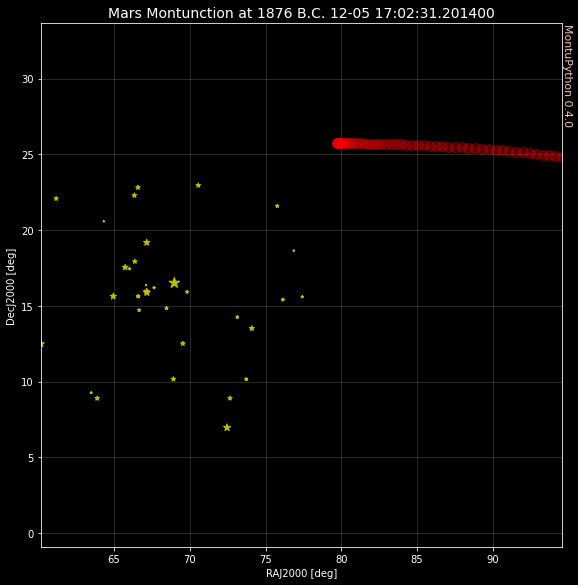

In [15]:
# Plot Hyades
hyades = allstars.get_stars_area(RA=aldebaran.data.RA,Dec=aldebaran.data.Dec,radius=10,Mag=[-1,5])
fig,ax = hyades.plot_stars(pad=0.0,labels=False,figargs=dict(figsize=(8,8)))

for index in mars.df.index:
    mars_position = mars.df.loc[index]
    ax.plot(15*mars_position.RAJ2000,mars_position.DecJ2000,'ro',ms=10,alpha=0.3)

ax.set_title(f"Mars Montunction at {mtime_montunction.datespice}",fontsize=14)
Montu.montu_mark(ax)

## Interesting montunctions

We are interested in the Montunctions happening around the date of birth or dead of Senenmut who, according to several chronologies lived between 1480bce and 1458 bce. Let's select the montunctions in this range:

In [16]:
mtime_start = MonTime('bce1480-01-01 00:00:00.00')+(-50*YEAR)
mtime_end = MonTime('bce1480-01-01 00:00:00.00')+50*YEAR

cond = (montunctions.jed>=mtime_start.jed) & (montunctions.jed<=mtime_end.jed)
print("Number of montunctions in the desired interval: ",cond.sum())

montunctions_selected = montunctions.loc[cond]
montunctions_selected

Number of montunctions in the desired interval:  2


,datepro,datemix,datejul,jed,closest_solstice,aldebaran_angdist,close_solstice,close_aldebaran,montunctions
489,-1512-12-10 23:40:17.252100,-1512-12-24 23:40:17,3200-12-24 23:40:17,1.16915848631078773e+06,8.28225414128974080,14.72220841596218754,True,True,True
537,-1465-12-06 03:30:47.843000,-1465-12-19 03:30:48,3247-12-19 03:30:48,1.18631864638707135e+06,14.54971300601027906,9.84821383976247056,True,True,True


Let's see the montunctions:


Text(1, 1, 'MontuPython 0.4.0')

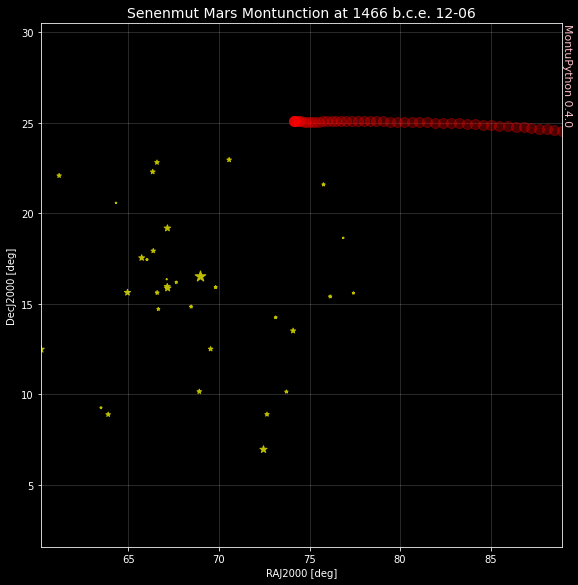

In [17]:
# Time of montunction
isel = 1
mtime_montunction = MonTime(montunctions_selected.iloc[isel].jed,format='jd')
t = mtime_montunction.tt

mars.reset_store()
for t in np.linspace(-50*DAY,0*DAY,50):
    # Get MonTime object
    mtime = mtime_montunction + t

    # Calculate Mars position and store it
    mars.calculate_sky_position(mtime,tebas,method='SPICE',store=1,verbose=0)

# Plot Hyades
hyades = allstars.get_stars_area(RA=aldebaran.data.RA,Dec=aldebaran.data.Dec,radius=10,Mag=[-1,5])
fig,ax = hyades.plot_stars(pad=0.0,labels=False,figargs=dict(figsize=(8,8)))

for index in mars.df.index:
    mars_position = mars.df.loc[index]
    ax.plot(15*mars_position.RAJ2000,mars_position.DecJ2000,'ro',ms=10,alpha=0.3)

ax.set_title(f"Senenmut Mars Montunction at {-mtime_montunction.year+1} b.c.e. {mtime_montunction.month:02d}-{mtime_montunction.day:02d}",fontsize=14)
Montu.montu_mark(ax)